# Final Frontier

Project workbook for space project

In [1]:
#Imports

import warnings
warnings.filterwarnings("ignore")

#for data manipulation
import pandas as pd

#data visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Set figure size for all plots
plt.rc("figure", figsize = (16,16))

#Set fontsize for titles
plt.rc("font", size=14)

In [2]:
#bring in dataframe

df = pd.read_csv("../Data/Space_Corrected.csv")


In [3]:
df.shape

(4324, 9)

In [4]:
df.sample(4)

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
1798,1798,1798,RVSN USSR,"Site 43/4, Plesetsk Cosmodrome, Russia","Thu Sep 20, 1990 20:16 UTC",Molniya-M /Block ML | Molniya-3 n†­145,StatusRetired,NaN,Success
346,346,346,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Wed Jun 14, 2017 09:20 UTC",Soyuz 2.1a | Progress MS-06 (67P),StatusActive,48.5,Success
3114,3114,3114,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Thu Aug 30, 1973 10:30 UTC",Voskhod | Cosmos 583,StatusRetired,NaN,Success
2917,2917,2917,RVSN USSR,"Site 41/1, Plesetsk Cosmodrome, Russia","Fri Jun 27, 1975 13:00 UTC",Voskhod | Cosmos 747,StatusRetired,NaN,Success


In [5]:
#drop columns
df.drop(columns=["Unnamed: 0", "Unnamed: 0.1"], inplace = True)

In [6]:
df

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [7]:
#check 
df.isnull().sum()

Company Name         0
Location             0
Datum                0
Detail               0
Status Rocket        0
 Rocket           3360
Status Mission       0
dtype: int64

In [8]:
#check how many unique companies companies are listed
df["Company Name"].nunique()

56

In [9]:
df["Company Name"].unique()

array(['SpaceX', 'CASC', 'Roscosmos', 'ULA', 'JAXA', 'Northrop', 'ExPace',
       'IAI', 'Rocket Lab', 'Virgin Orbit', 'VKS RF', 'MHI', 'IRGC',
       'Arianespace', 'ISA', 'Blue Origin', 'ISRO', 'Exos', 'ILS',
       'i-Space', 'OneSpace', 'Landspace', 'Eurockot', 'Land Launch',
       'CASIC', 'KCST', 'Sandia', 'Kosmotras', 'Khrunichev', 'Sea Launch',
       'KARI', 'ESA', 'NASA', 'Boeing', 'ISAS', 'SRC', 'MITT', 'Lockheed',
       'AEB', 'Starsem', 'RVSN USSR', 'EER', 'General Dynamics',
       'Martin Marietta', 'Yuzhmash', 'Douglas', 'ASI', 'US Air Force',
       'CNES', 'CECLES', 'RAE', 'UT', 'OKB-586', 'AMBA',
       "Arm??e de l'Air", 'US Navy'], dtype=object)

In [10]:
df["Status Mission"].nunique()

4

In [11]:
df["Status Mission"].unique()

array(['Success', 'Failure', 'Prelaunch Failure', 'Partial Failure'],
      dtype=object)

In [12]:
#create a crosstab for comanies and status mission
ctab_df = pd.crosstab(df["Status Mission"], df["Company Name"])

In [13]:
#function to create a distro plot

def distro_plot_for_single_column(dataframe, column_name):
    """Taked in a dataframe name and column name
    and return a distrobution plot for that column"""
    
    #Set figure size for all plots
    plt.rc("figure", figsize = (16,16))

    #Set fontsize for titles
    plt.rc("font", size=14)
    
    #Set color for distro plot
    c = "#5B0A91"
    plt.title(f"Distribution plot for {column_name}")
    sns.distplot(dataframe[column_name], color = c)

In [14]:
def ditro_plot_for_entire_df(df):
    """
    Takes in a numerical only dataframe such as a crosstab
    and returns Distribution plots for each column in the
    dataframe.
    """
    for i, col in enumerate(df.columns):
        plt.figure(i)
        distro_plot_for_single_column(df, col)

In [15]:
#test function to make sure it works and comment out after testing
#ditro_plot_for_entire_df(ctab_df)

In [16]:
df

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


To do:

Use a label encoder on status mission


## Mission Status Distribution

In [17]:
df_1 = df["Status Mission"].value_counts().reset_index()

In [18]:
df_1

,index,Status Mission
0,Success,3879
1,Failure,339
2,Partial Failure,102
3,Prelaunch Failure,4


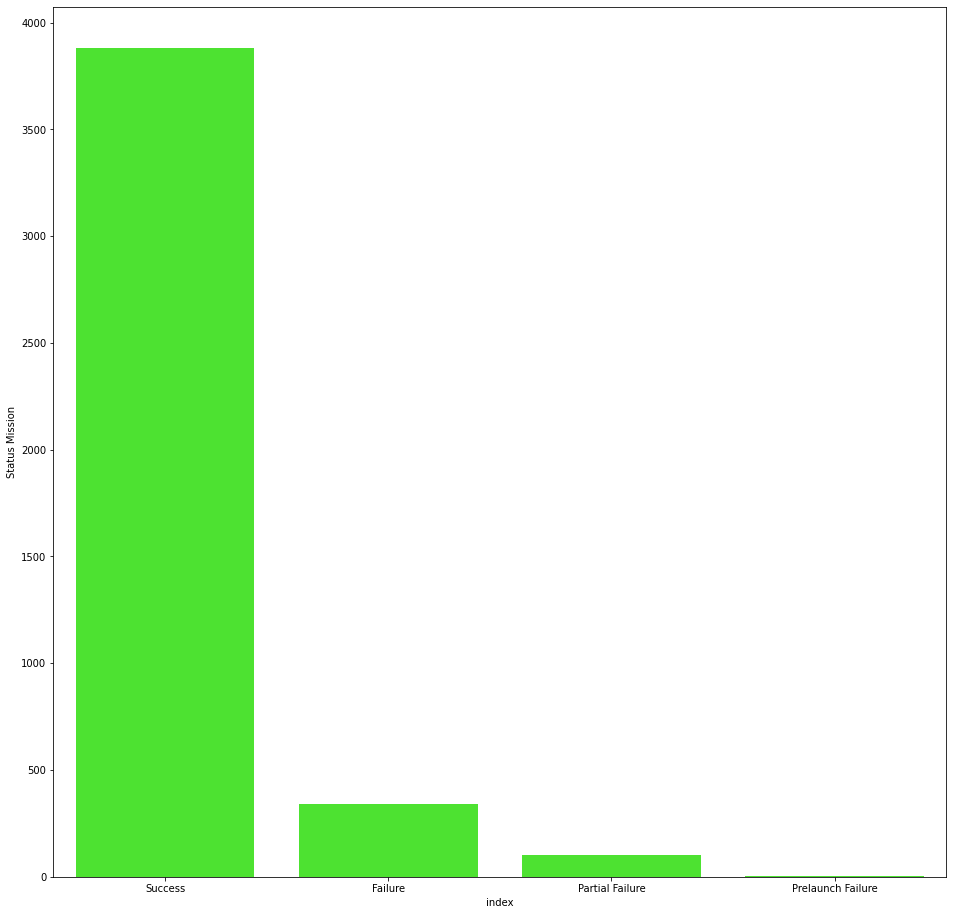

In [19]:
plt.figure("figure", figsize = (16,16))
sns.barplot(df_1["index"], df_1["Status Mission"], color="#39FF14")

In [20]:
def mission_status_distro_plot(df):
    """
    Takes i the sapce dataframe and returns a
    barplot for the number of launches for 
    each Status mission
    """
    #ccreate a df that counts the missions for each status
    df_1 = df["mission_status"].value_counts().reset_index()
    
    plt.figure("figure", figsize = (16,16))
    sns.barplot(df_1["index"], df_1["mission_status"], color="#39FF14")
    plt.title("Number of missions by Mission Status", fontsize = 14)

In [21]:
def get_space_data():
    # Pull in the data into a pandas data frame
    df = pd.read_csv("../data/Space_Corrected.csv")

    # drop excess columns generated by pandas
    df.drop(columns=["Unnamed: 0", "Unnamed: 0.1"], inplace=True)

    # Rename the columns
    df.pipe(rename_columns)

    # Fix the values within the rocket_status column
    df.pipe(fix_rocket_status)
    
    # Fix the values/type within mission_cost
    df.pipe(fix_mission_cost)

    # Change the date column to a pandas datetime type
    df.date_time = pd.to_datetime(df.date_time)
    
    # Create the year column
    df['year'] = df.date_time.apply(lambda datetime: datetime.year)
    
    # Create the Month column
    df['month'] = df.date_time.apply(lambda datetime: datetime.month)

    # Set the index to be the datetime column, then drop it from the dataframe
    df.set_index(df.date_time, inplace=True)
    df.drop(columns="date_time", inplace=True)

    # Fill missing values with 0
    df.mission_cost.fillna(0, inplace=True)
    
    df.pipe(get_country_name)
    return df


def rename_columns(df):
    new_col_names = [
        "company_name",
        "location",
        "date_time",
        "rocket_type",
        "rocket_status",
        "mission_cost",
        "mission_status",
    ]
    df.columns = new_col_names
    return df


def fix_mission_cost(df):
    df.mission_cost = df.mission_cost.str.replace(' ', '')
    df.mission_cost = df.mission_cost.str.replace(',', '')
    df.mission_cost.astype(float)
    return df


def fix_rocket_status(df):
    df.loc[df.rocket_status == "StatusRetired", "rocket_status"] = "retired"
    df.loc[df.rocket_status == "StatusActive", "rocket_status"] = "active"
    return df

def get_country_name(df):
    """
    Takes in the a dataframe and return the Country name in 
    a new column
    """
    df['country'] = df['location'].str.split(', ').str[-1]
    df['country'].loc[df['country'] == 'Shahrud Missile Test Site'] = "Iran"
    df['country'].loc[df['country'] == 'New Mexico'] = 'United States of America'
    df['country'].loc[df['country'] == 'Yellow Sea'] = "China"
    df['country'].loc[df['country'] == 'Pacific Missile Range Facility'] = "United States of America"
    df['country'].loc[df['country'] == 'Pacific Ocean'] = "United States of America"
    df['country'].loc[df['country'] == 'Barents Sea'] = 'Russia'
    df['country'].loc[df['country'] == 'Gran Canaria'] = 'United States of America'
    df['country'].loc[df['country'] == 'USA'] = 'United States of America'
    return df

In [22]:
def mission_result(df):
    # Creating a new column and setting it's default as 1
    df['mission_result'] = 1
    
    # Slicing by the rows that contain a failure, then setting the result to 0
    df.loc[df.mission_status.str.contains('Failure'), 'mission_result'] = 0
    
    return df

In [23]:
df = get_space_data()

In [24]:
df = mission_result(df)

In [25]:
df.sample()

,company_name,location,rocket_type,rocket_status,mission_cost,mission_status,year,month,country,mission_result
date_time,,,,,,,,,,
1970-03-04 12:14:00+00:00,RVSN USSR,"Site 43/4, Plesetsk Cosmodrome, Russia",Voskhod | Cosmos 325,retired,0,Success,1970,3,Russia,1


In [26]:
df.head()

,company_name,location,rocket_type,rocket_status,mission_cost,mission_status,year,month,country,mission_result
date_time,,,,,,,,,,
2020-08-07 05:12:00+00:00,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,active,50.0,Success,2020,8,United States of America,1
2020-08-06 04:01:00+00:00,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",Long March 2D | Gaofen-9 04 & Q-SAT,active,29.75,Success,2020,8,China,1
2020-08-04 23:57:00+00:00,SpaceX,"Pad A, Boca Chica, Texas, USA",Starship Prototype | 150 Meter Hop,active,0,Success,2020,8,United States of America,1
2020-07-30 21:25:00+00:00,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,active,65.0,Success,2020,7,Kazakhstan,1
2020-07-30 11:50:00+00:00,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",Atlas V 541 | Perseverance,active,145.0,Success,2020,7,United States of America,1


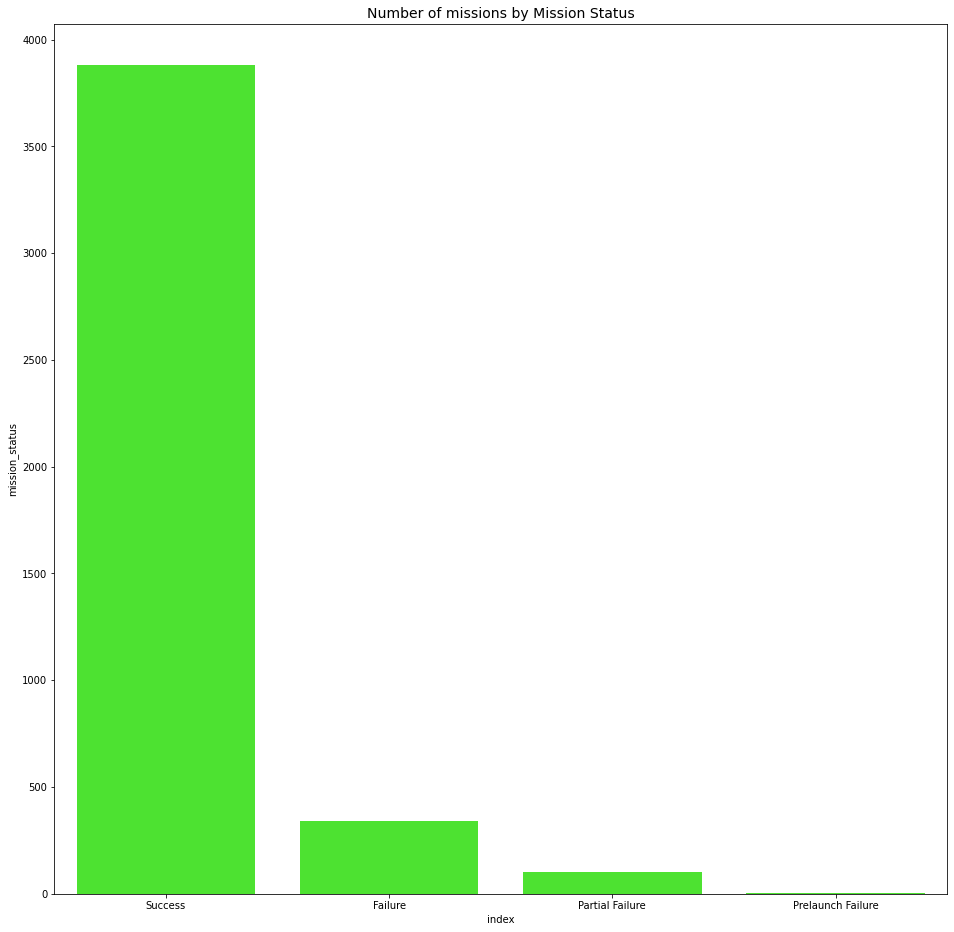

In [27]:
mission_status_distro_plot(df)

In [28]:
df.country.value_counts()

Russia                      1398
United States of America    1387
Kazakhstan                   701
France                       303
China                        269
Japan                        126
India                         76
Iran                          14
New Zealand                   13
Israel                        11
Kenya                          9
Australia                      6
North Korea                    5
South Korea                    3
Brazil                         3
Name: country, dtype: int64

In [29]:
#df['year'] = df.date_time.apply(lambda datetime: datetime.year)

In [30]:
df.head()

,company_name,location,rocket_type,rocket_status,mission_cost,mission_status,year,month,country,mission_result
date_time,,,,,,,,,,
2020-08-07 05:12:00+00:00,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,active,50.0,Success,2020,8,United States of America,1
2020-08-06 04:01:00+00:00,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",Long March 2D | Gaofen-9 04 & Q-SAT,active,29.75,Success,2020,8,China,1
2020-08-04 23:57:00+00:00,SpaceX,"Pad A, Boca Chica, Texas, USA",Starship Prototype | 150 Meter Hop,active,0,Success,2020,8,United States of America,1
2020-07-30 21:25:00+00:00,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,active,65.0,Success,2020,7,Kazakhstan,1
2020-07-30 11:50:00+00:00,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",Atlas V 541 | Perseverance,active,145.0,Success,2020,7,United States of America,1


In [31]:
table = pd.pivot_table(df, values='year', index='country',
                    columns='mission_status', aggfunc='count', fill_value=0)
table['Success (in prc)'] = table['Success'] / table.sum(axis=1)
table.style.format({'Success (in prc)' : '{:.2%}'})\
           .background_gradient(cmap='Reds')\
           .background_gradient(cmap='Greens',subset=["Success"])\
           .background_gradient(cmap='Greens',subset=["Success (in prc)"])

mission_status,Failure,Partial Failure,Prelaunch Failure,Success,Success (in prc)
country,,,,,
Australia,3,0,0,3,50.00%
Brazil,2,0,1,0,0.00%
China,19,6,0,244,90.71%
France,13,5,0,285,94.06%
India,8,5,0,63,82.89%
Iran,8,0,1,5,35.71%
Israel,2,0,0,9,81.82%
Japan,10,3,0,113,89.68%
Kazakhstan,72,20,1,608,86.73%


In [32]:
def success_percent_by_country(df):
    """
    Takes in the space df and returns a table with the following by Country:
    Failure
    Partial Failure
    Prelaunch Failure
    Success
    Succes in percent
    """
    table = pd.pivot_table(df, values='year', index='country',
                    columns='mission_status', aggfunc='count', fill_value=0)
    table['Success (in prc)'] = table['Success'] / table.sum(axis=1)
    return table.style.format({'Success (in prc)' : '{:.2%}'})\
               .background_gradient(cmap='Reds')\
               .background_gradient(cmap='Greens',subset=["Success"])\
               .background_gradient(cmap='Greens',subset=["Success (in prc)"])


In [33]:
success_percent_by_country(df)

mission_status,Failure,Partial Failure,Prelaunch Failure,Success,Success (in prc)
country,,,,,
Australia,3,0,0,3,50.00%
Brazil,2,0,1,0,0.00%
China,19,6,0,244,90.71%
France,13,5,0,285,94.06%
India,8,5,0,63,82.89%
Iran,8,0,1,5,35.71%
Israel,2,0,0,9,81.82%
Japan,10,3,0,113,89.68%
Kazakhstan,72,20,1,608,86.73%


In [34]:
data_fail = df[(df['mission_status'] != 'Success') & (df['mission_cost'] != 0)]

In [35]:
## Relationship between companies and mission status
active_df = df[df["rocket_status"] == "StatusActive"]
active_df = active_df.groupby("company_name").count()["rocket_type"].sort_values(ascending=False).reset_index()

In [36]:
active_df.head()

,company_name,rocket_type


In [37]:
len(active_df)

0

In [38]:
companies = df.groupby("company_name")["rocket_type"].count().sort_values(ascending=False).reset_index()
companies.head()

,company_name,rocket_type
0,RVSN USSR,1777
1,Arianespace,279
2,General Dynamics,251
3,CASC,251
4,NASA,203


In [39]:
len(companies)

56

In [40]:
top = companies[1:40]
cmp = df.groupby(["company_name", "rocket_status"]).count()["rocket_type"].reset_index()
active = cmp[cmp["rocket_status"] == "active"].sort_values("rocket_type")
retired = cmp[cmp["rocket_status"] != "active"].sort_values("rocket_type")

In [41]:
cmp

,company_name,rocket_status,rocket_type
0,AEB,active,3
1,AMBA,retired,8
2,ASI,retired,9
3,Arianespace,active,114
4,Arianespace,retired,165
...,...,...,...
69,VKS RF,active,27
70,VKS RF,retired,174
71,Virgin Orbit,active,1
72,Yuzhmash,retired,2


In [42]:
active

,company_name,rocket_status,rocket_type
73,i-Space,active,1
59,Sandia,active,1
52,OneSpace,active,1
7,Boeing,active,1
38,Khrunichev,active,1
11,CASIC,active,1
17,ESA,active,1
71,Virgin Orbit,active,1
27,IRGC,active,1
0,AEB,active,3


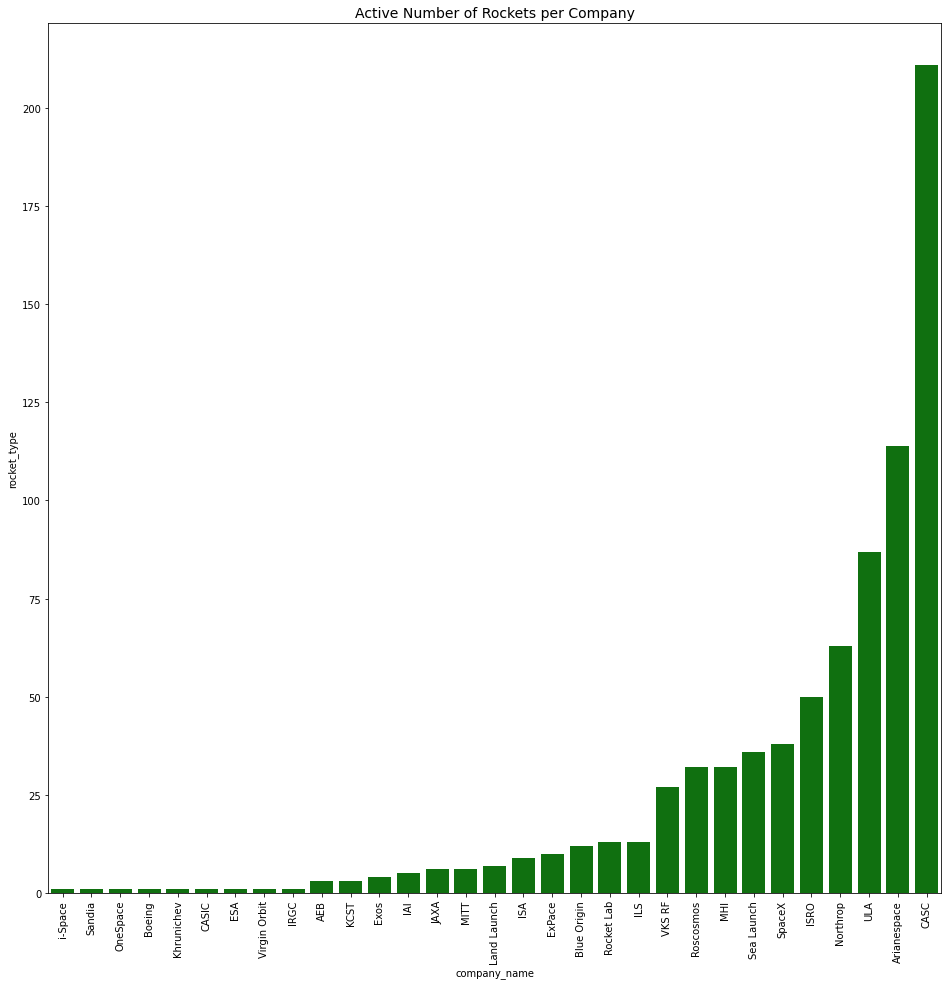

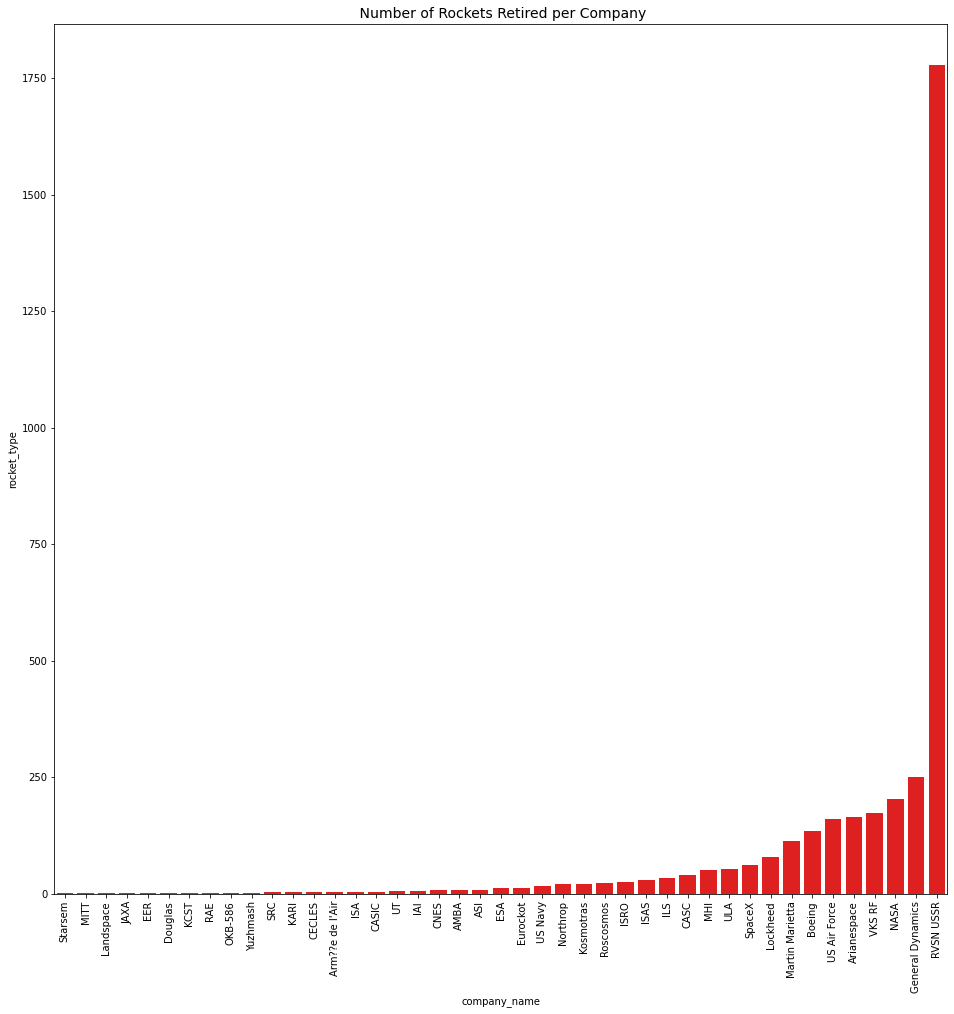

In [43]:
plt.figure(figsize=(16,16))

chart = sns.barplot(x=active.company_name, y=active.rocket_type, color="green")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title("Active Number of Rockets per Company", fontsize = 14)

plt.figure(figsize=(16,16))
chart1 = sns.barplot(x=retired.company_name, y=retired.rocket_type, color="red")
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=90)
plt.title(" Number of Rockets Retired per Company", fontsize = 14)


plt.show()


In [44]:
def plot_rocket_type_and_status_by_company(df):
    """
    Takes in the space df and groups data into active and retired
    return 2 barplots:
    1. Number of Active Rocket Types for each Company
    2. Number of Retired Rocket Types for each Company    
    """
    
    #Group and split the data
    cmp = df.groupby(["company_name", "rocket_status"]).count()["rocket_type"].reset_index()
    active = cmp[cmp["rocket_status"] == "active"].sort_values("rocket_type")
    retired = cmp[cmp["rocket_status"] != "active"].sort_values("rocket_type")
    
    #Set the figure size for Active barplot
    plt.figure(figsize=(16,16))
    
    #Active Barplot
    chart = sns.barplot(x=active.company_name, y=active.rocket_type, color="green")
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.title("Number of Active Rocket Types for each Company", fontsize = 14)
    
    #Set the figure size for Retired barplot
    plt.figure(figsize=(16,16))
    
    #Retired Barplot
    chart1 = sns.barplot(x=retired.company_name, y=retired.rocket_type, color="red")
    chart1.set_xticklabels(chart1.get_xticklabels(), rotation=90)
    plt.title("Number of Retired Rocket Types for each Company", fontsize = 14)

    plt.show()

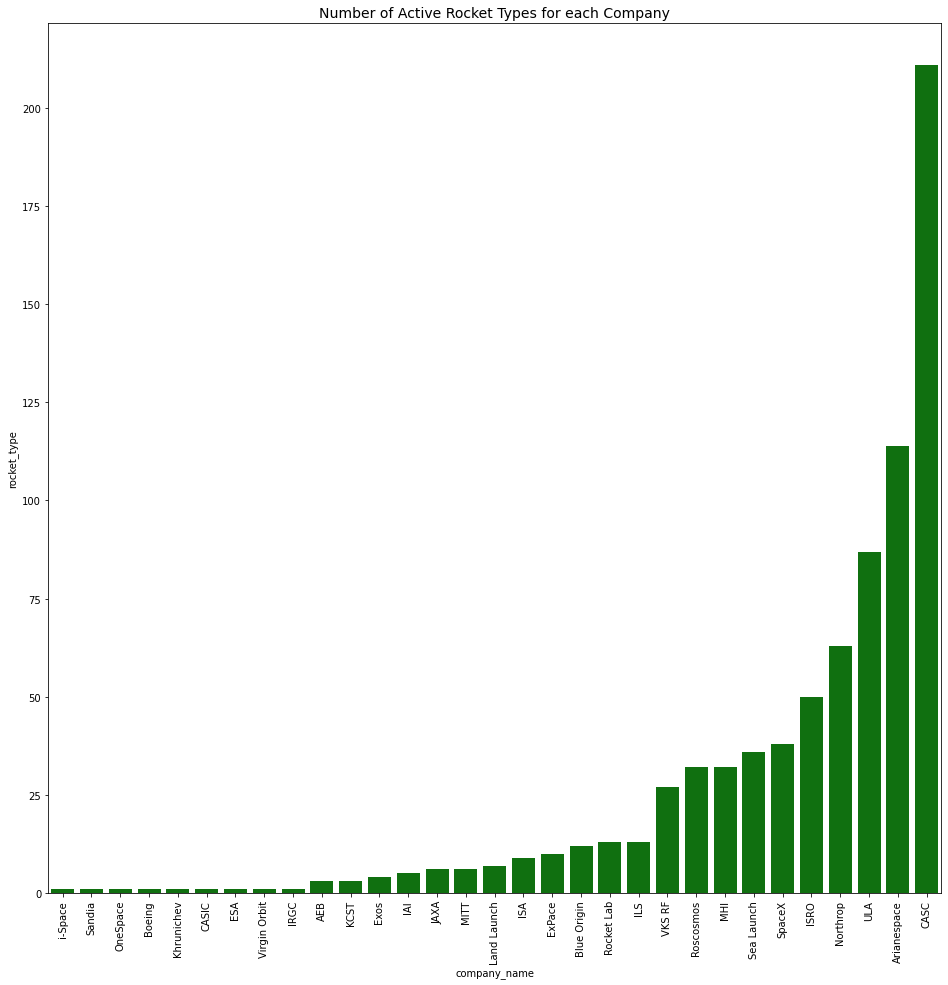

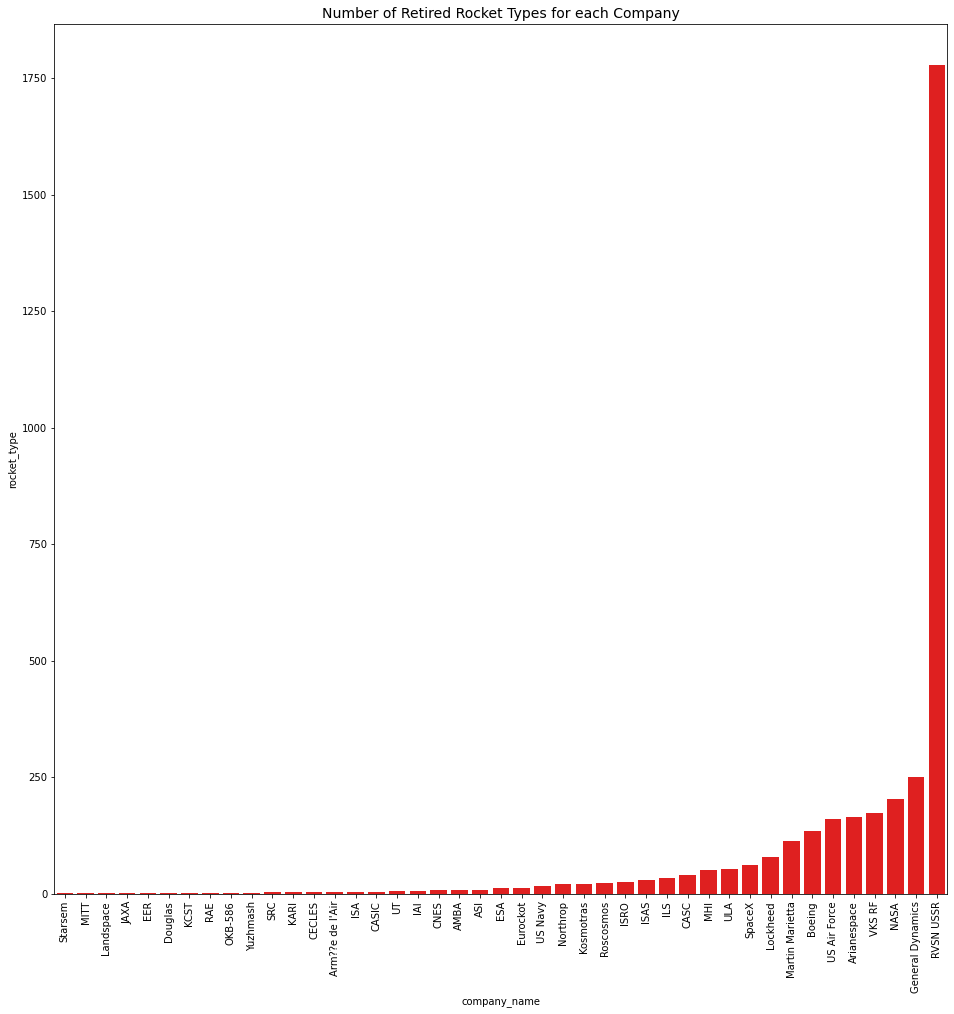

In [45]:
plot_rocket_type_and_status_by_company(df)

In [46]:
retired

,company_name,rocket_status,rocket_type
63,Starsem,retired,1
46,MITT,retired,1
41,Landspace,retired,1
34,JAXA,retired,1
16,EER,retired,1
15,Douglas,retired,1
37,KCST,retired,2
53,RAE,retired,2
51,OKB-586,retired,2
72,Yuzhmash,retired,2


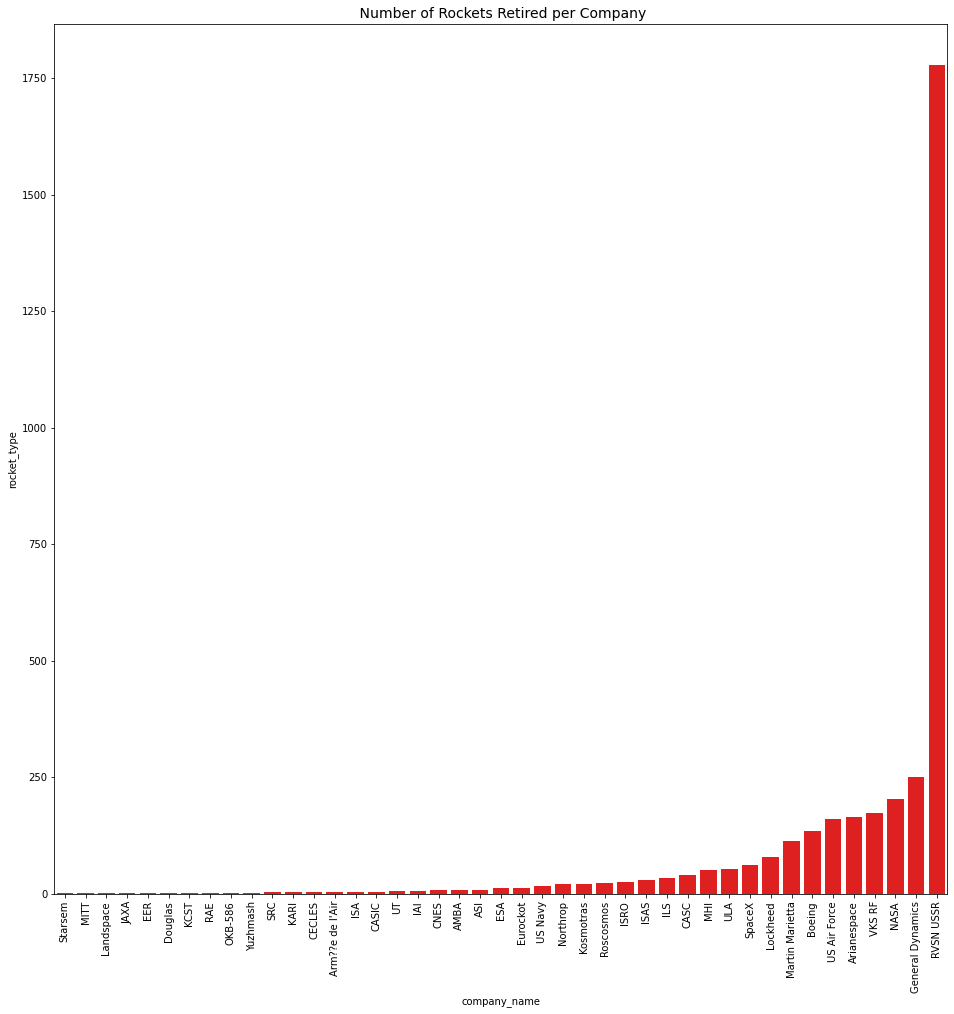

In [47]:
plt.figure(figsize=(16,16))
chart1 = sns.barplot(x=retired.company_name, y=retired.rocket_type, color="red")
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=90)
plt.title(" Number of Rockets Retired per Company", fontsize = 14)
plt.show()

In [48]:
cmp.head()

,company_name,rocket_status,rocket_type
0,AEB,active,3
1,AMBA,retired,8
2,ASI,retired,9
3,Arianespace,active,114
4,Arianespace,retired,165


In [49]:
df.head()

,company_name,location,rocket_type,rocket_status,mission_cost,mission_status,year,month,country,mission_result
date_time,,,,,,,,,,
2020-08-07 05:12:00+00:00,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,active,50.0,Success,2020,8,United States of America,1
2020-08-06 04:01:00+00:00,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",Long March 2D | Gaofen-9 04 & Q-SAT,active,29.75,Success,2020,8,China,1
2020-08-04 23:57:00+00:00,SpaceX,"Pad A, Boca Chica, Texas, USA",Starship Prototype | 150 Meter Hop,active,0,Success,2020,8,United States of America,1
2020-07-30 21:25:00+00:00,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,active,65.0,Success,2020,7,Kazakhstan,1
2020-07-30 11:50:00+00:00,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",Atlas V 541 | Perseverance,active,145.0,Success,2020,7,United States of America,1


## Launches by Company

In [50]:
#create a dataframe counting the number of times each company appears in a row
company_numbers = df["company_name"].value_counts().reset_index()
company_numbers

,index,company_name
0,RVSN USSR,1777
1,Arianespace,279
2,CASC,251
3,General Dynamics,251
4,NASA,203
5,VKS RF,201
6,US Air Force,161
7,ULA,140
8,Boeing,136
9,Martin Marietta,114


In [51]:
#rename the columns to mathc what they represent
company_numbers.columns = ["company_name", "number_of_launches"]

In [52]:
company_numbers

,company_name,number_of_launches
0,RVSN USSR,1777
1,Arianespace,279
2,CASC,251
3,General Dynamics,251
4,NASA,203
5,VKS RF,201
6,US Air Force,161
7,ULA,140
8,Boeing,136
9,Martin Marietta,114


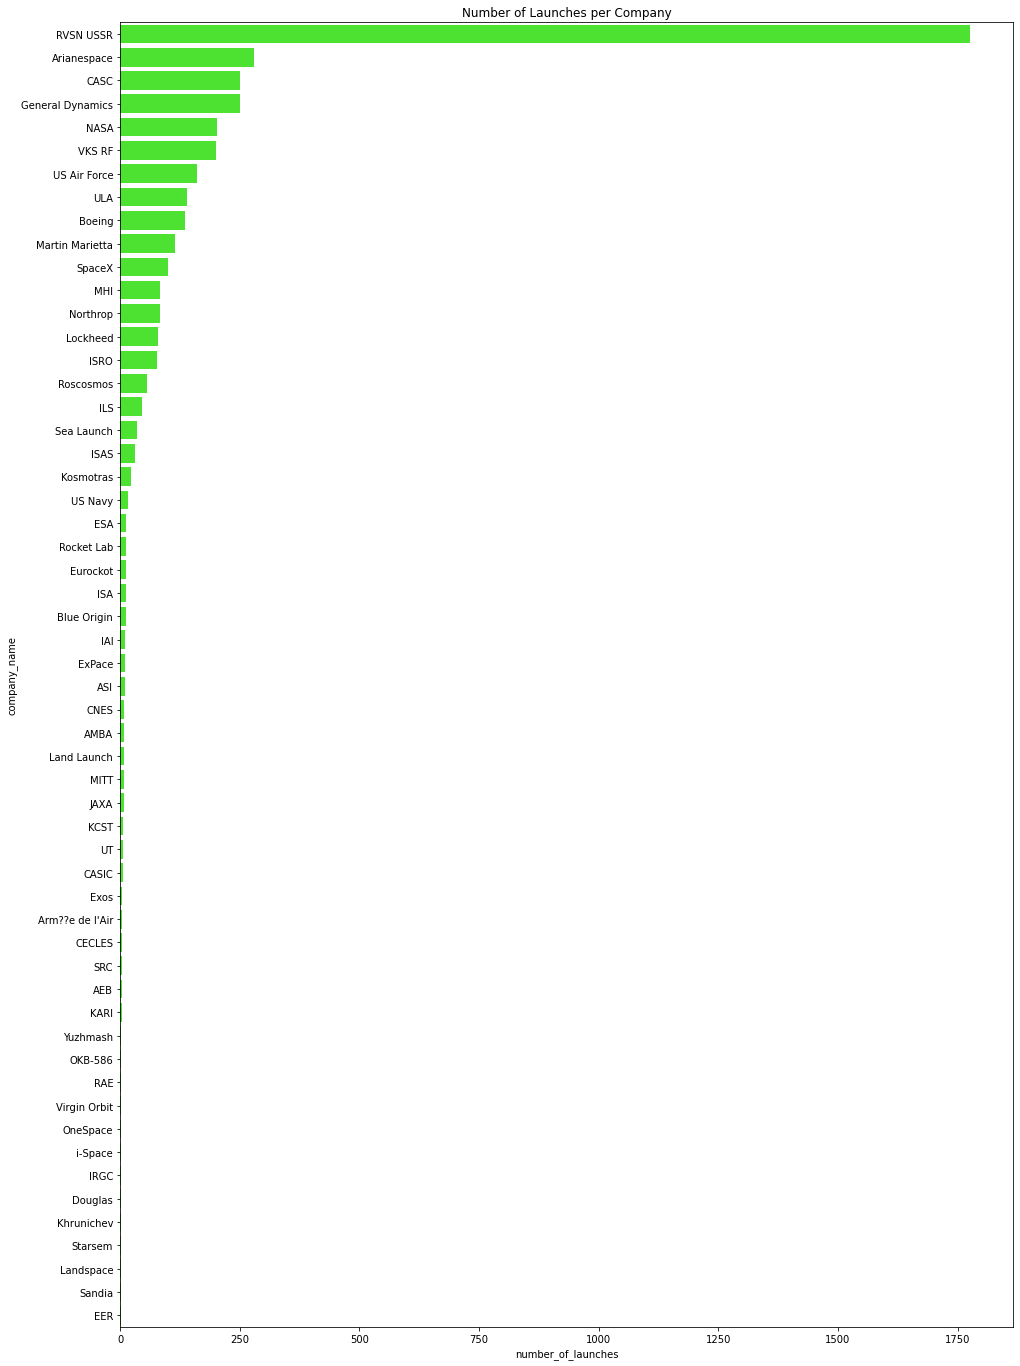

In [53]:
plt.figure(figsize=(16,24))
sns.barplot(x = company_numbers.number_of_launches, y = company_numbers.company_name, color = "#39FF14")
plt.title("Number of Launches per Company")
plt.show()

In [63]:
def plot_number_of_launches_per_company(df):
    """
    Takes in the space df and returns a
    bar plot thay shows the number of
    launches for each company in the data
    """
    
    #create a dataframe counting the number of times each company appears in a row
    company_numbers = df["company_name"].value_counts().reset_index()
    
    #rename the columns to mathc what they represent
    company_numbers.columns = ["company_name", "number_of_launches"]
    
    #create the barplot
    plt.figure(figsize=(16,24))
    sns.barplot(x = company_numbers.number_of_launches, y = company_numbers.company_name, color = "#39FF14")
    plt.title("Number of Launches per Company")
    plt.show()

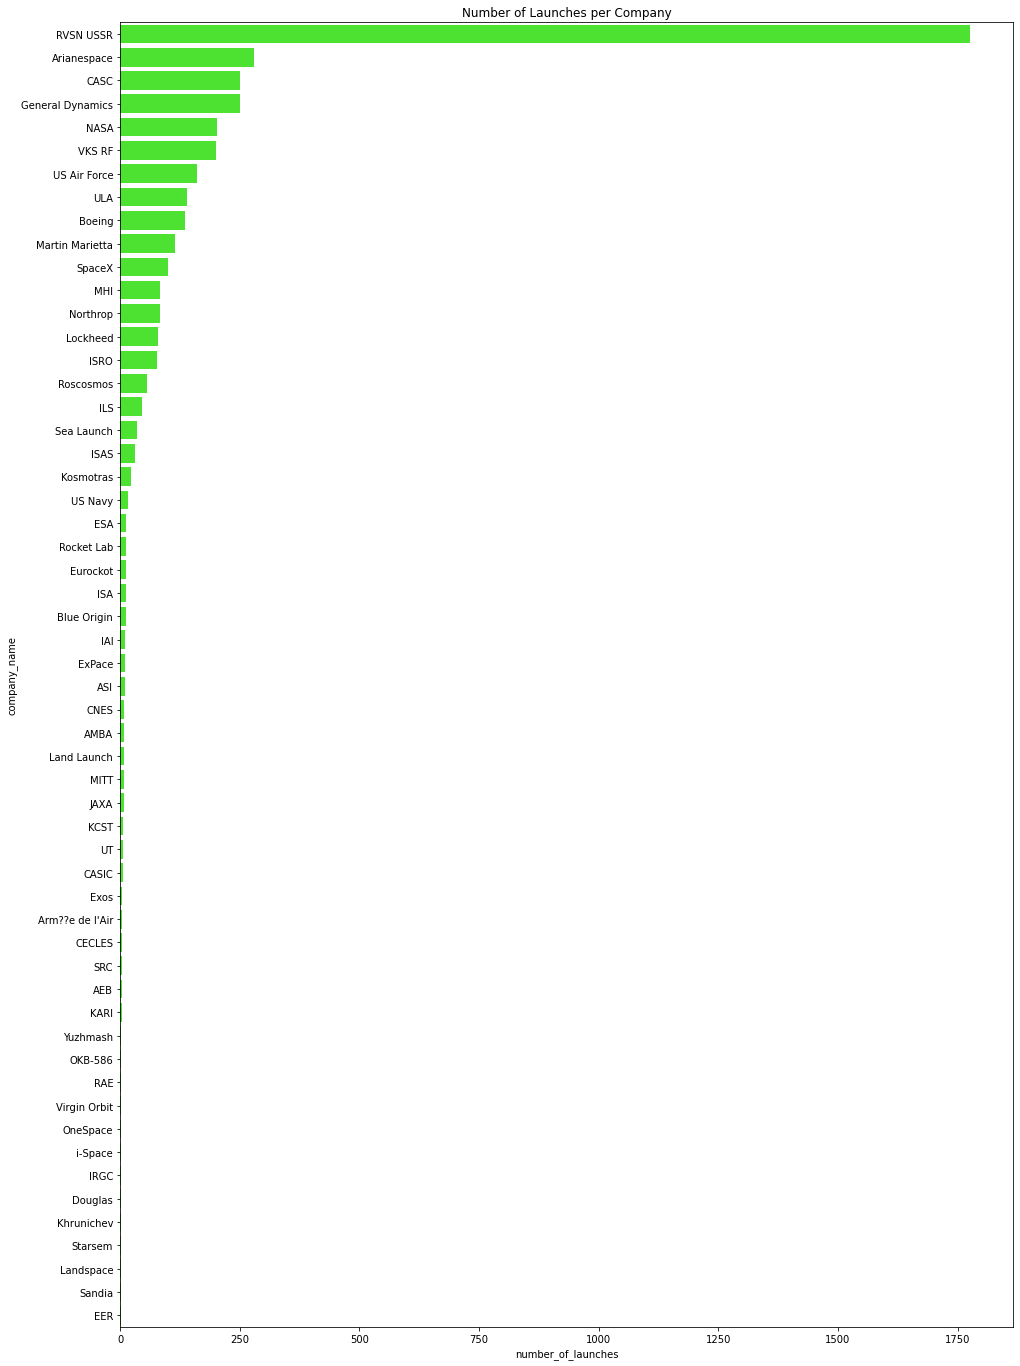

In [64]:
#test the function created above
plot_number_of_launches_per_company(df)

In [54]:
df.head(1)

,company_name,location,rocket_type,rocket_status,mission_cost,mission_status,year,month,country,mission_result
date_time,,,,,,,,,,
2020-08-07 05:12:00+00:00,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,active,50.0,Success,2020,8,United States of America,1


In [55]:
df.dtypes

company_name      object
location          object
rocket_type       object
rocket_status     object
mission_cost      object
mission_status    object
year               int64
month              int64
country           object
mission_result     int64
dtype: object

In [56]:
df.mission_cost = df.mission_cost.str.replace(' ', '')
df.mission_cost = df.mission_cost.str.replace(',', '')
df.mission_cost = df.mission_cost.astype(float)
df.mission_cost = df.mission_cost.fillna(0)

## Rocket Value Distribution

In [57]:
not_zero = df[df.mission_cost != 0]
not_zero.mission_cost = not_zero.mission_cost * 1000000

In [58]:
not_zero

,company_name,location,rocket_type,rocket_status,mission_cost,mission_status,year,month,country,mission_result
date_time,,,,,,,,,,
2020-08-07 05:12:00+00:00,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,active,50000000.0,Success,2020,8,United States of America,1
2020-08-06 04:01:00+00:00,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",Long March 2D | Gaofen-9 04 & Q-SAT,active,29750000.0,Success,2020,8,China,1
2020-07-30 21:25:00+00:00,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,active,65000000.0,Success,2020,7,Kazakhstan,1
2020-07-30 11:50:00+00:00,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",Atlas V 541 | Perseverance,active,145000000.0,Success,2020,7,United States of America,1
2020-07-25 03:13:00+00:00,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",active,64680000.0,Success,2020,7,China,1
...,...,...,...,...,...,...,...,...,...,...
1966-07-29 18:43:00+00:00,US Air Force,"SLC-4W, Vandenberg AFB, California, USA",Titan IIIB | KH-8,retired,59000000.0,Success,1966,7,United States of America,1
1965-05-06 15:00:00+00:00,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",Titan IIIA | LES 2 & LCS 1,retired,63230000.0,Success,1965,5,United States of America,1
1965-02-11 15:19:00+00:00,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",Titan IIIA | LES 1,retired,63230000.0,Success,1965,2,United States of America,1


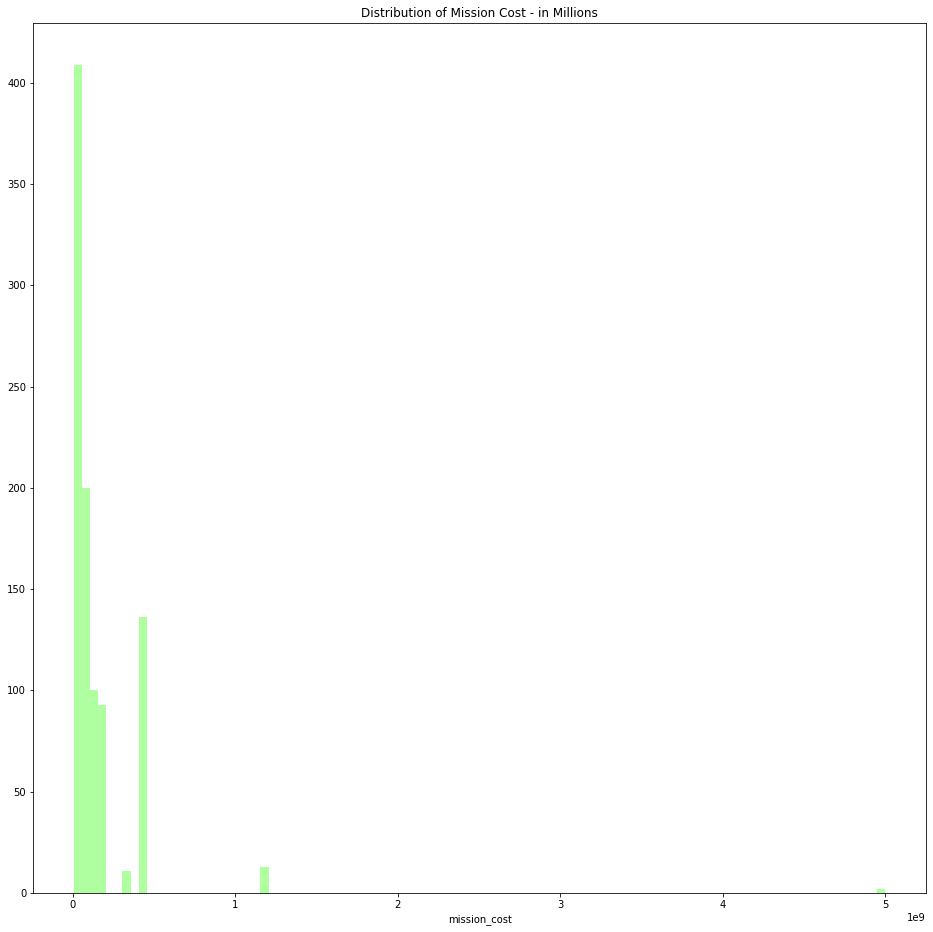

In [59]:
plt.figure(figsize = (16,16))
sns.distplot(not_zero.mission_cost, kde = False, bins = 100, color = "#39FF14")
plt.title("Distribution of Mission Cost - in Millions")
plt.show()

In [65]:
def distribution_of_rocket_cost(df):
    """
    Takes in the space df and returns a distribution
    plot for mission costs. All values at zero have been 
    dropped as these did not have values to begin with.
    """
    #drop all values that are zero
    not_zero = df[df.mission_cost != 0]
    
    #make values into the millions
    not_zero.mission_cost = not_zero.mission_cost * 1000000
    
    #create the plot
    plt.figure(figsize = (16,16))
    sns.distplot(not_zero.mission_cost, kde = False, bins = 100, color = "#39FF14")
    plt.title("Distribution of Mission Cost - in Millions")
    plt.show()

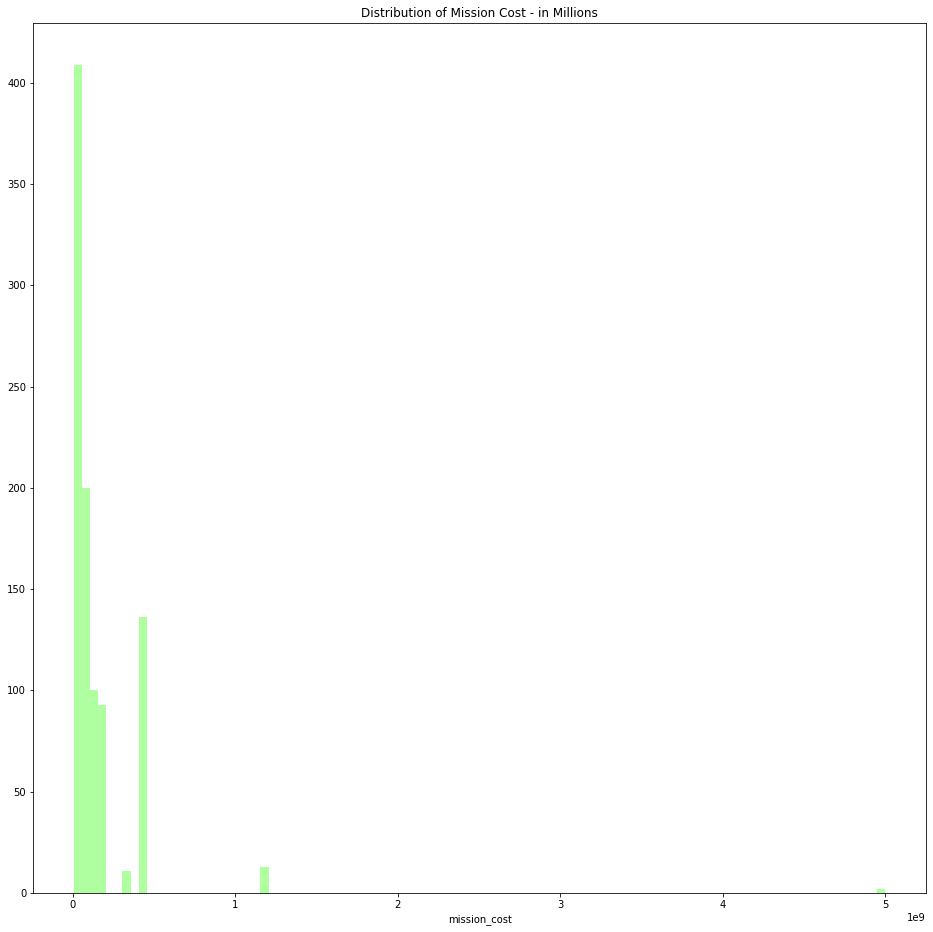

In [66]:
#test the function above
distribution_of_rocket_cost(df)

In [60]:
df.head(1)

,company_name,location,rocket_type,rocket_status,mission_cost,mission_status,year,month,country,mission_result
date_time,,,,,,,,,,
2020-08-07 05:12:00+00:00,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,active,50.0,Success,2020,8,United States of America,1


## Yearly Distribution

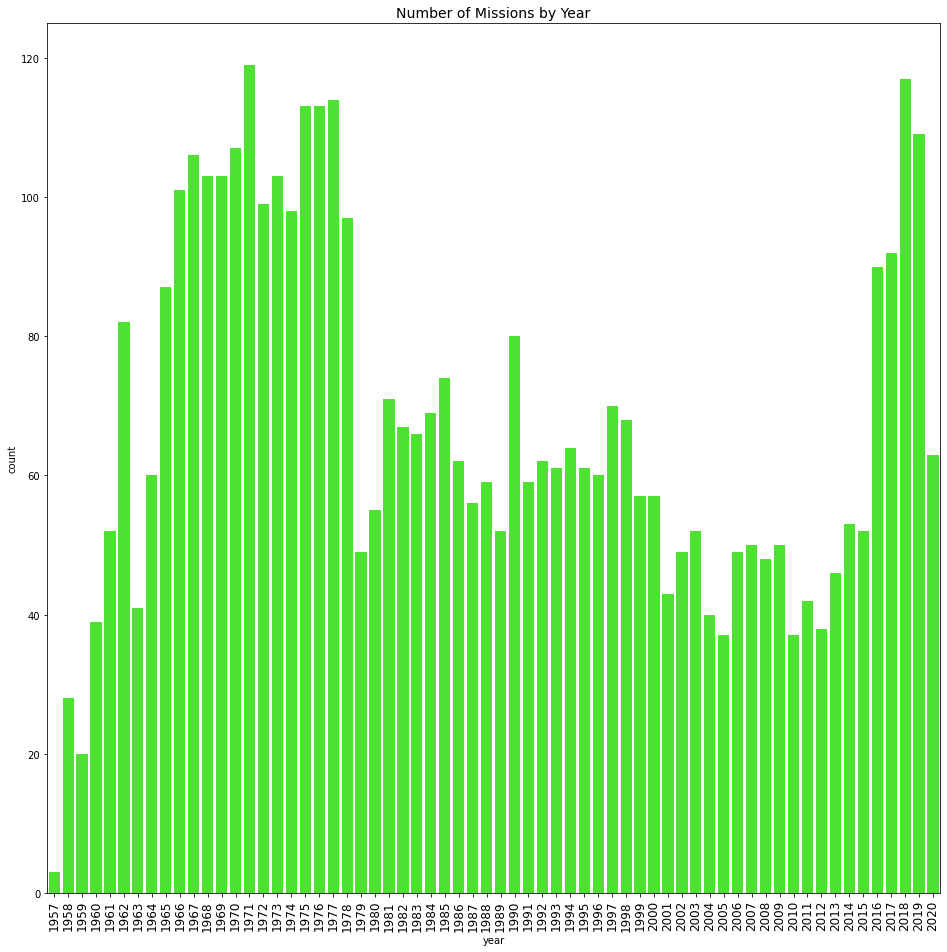

In [61]:
year_df = df["year"].value_counts().reset_index()
year_df.columns = ["year", "count"]

plt.figure(figsize=(16,16))
chart = sns.barplot(x=year_df["year"], y= year_df["count"], color = "#39FF14")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, fontsize= 12)
plt.title("Number of Missions by Year", fontsize = 14)
plt.show()

## Monthly Distribution

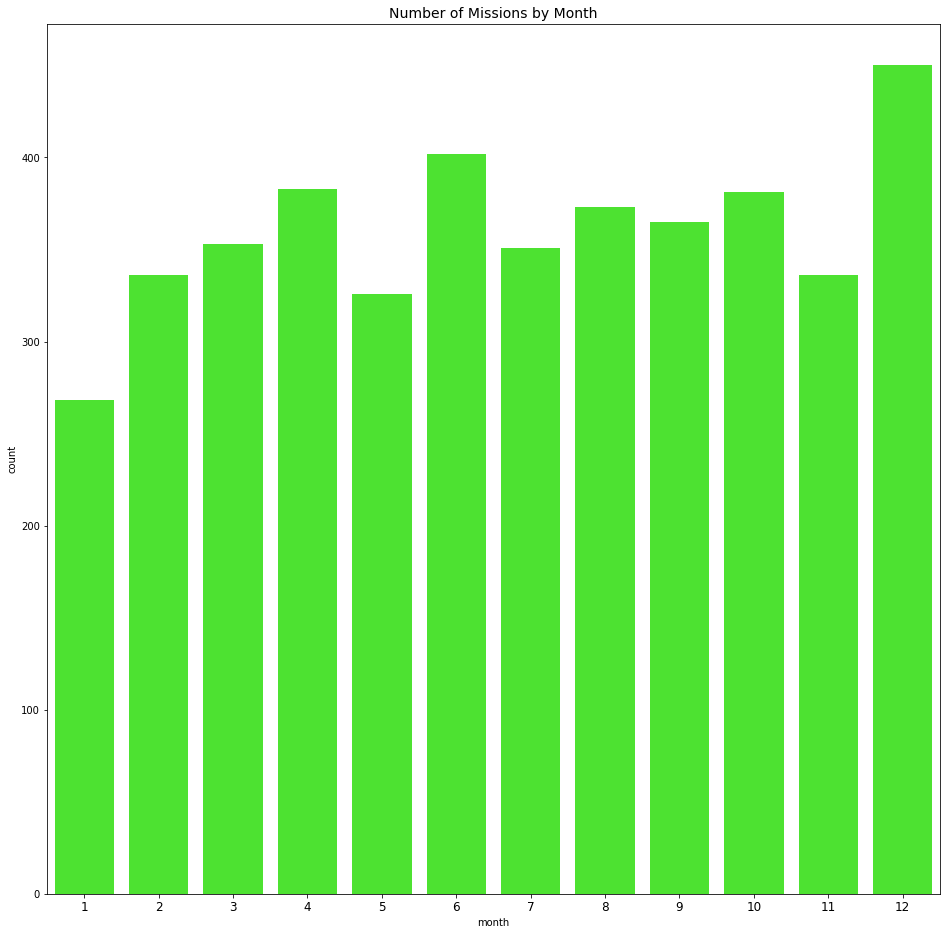

In [62]:
monthly_df = df["month"].value_counts().reset_index()
monthly_df.columns = ["month", "count"]

plt.figure(figsize= (16,16))
chart = sns.barplot(x = monthly_df["month"], y = monthly_df["count"], color = "#39FF14")
chart.set_xticklabels(chart.get_xticklabels(), fontsize= 12)
plt.title("Number of Missions by Month", fontsize = 14)
plt.show()